# Text Classification

# Environment 

# Dependencies

In [41]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import pickle
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn import model_selection, preprocessing

# Table of Contents

# Data Exploration

Once the environment is setup and dependencies are installed it is time to get started and explore our data set. For this particular article I have used a dataset consisting of more than 60000 textual sentences along with their respective targets.  

In [37]:
loc = '/home/codersarts/Desktop/Text-classification-master/hm_train.csv'
data = pd.read_csv(loc)
data.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [39]:
data['predicted_category'].unique()

array(['affection', 'exercise', 'bonding', 'leisure', 'achievement',
       'enjoy_the_moment', 'nature'], dtype=object)

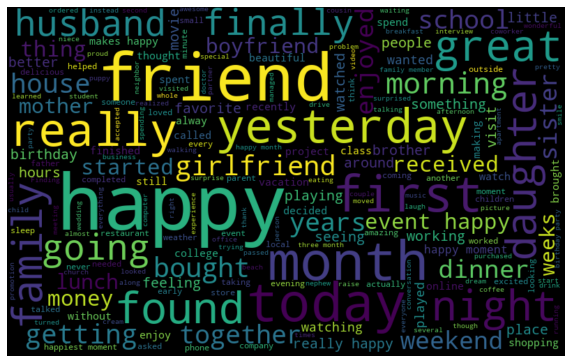

In [40]:
all_words = ' '.join([text for text in data['cleaned_hm']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Data Prepration & Feature Engineering

Sequal to data exploration is data prepration and feature engineering. In this step we encode the Target variable and vectorise the textual data present in our data set. This could be done in multiple ways such as:

1 : By using TF-IDF encoder
2 : count vectorizer
3 : word2vec etc

If the data had been more messy then this step would include cutting out noise as well .i.e. more of data preprcessing but since the data we have is already processed
we can simply leave that part. Also we need to split the data into training and validation set, this will come handy when we come to model evaluation. 

In [49]:
data.replace(r'\b\w{1,4}\b','', regex =True, inplace = True)
encoder = preprocessing.LabelEncoder()
data['Target'] = encoder.fit_transform(data['predicted_category'])
vectorizer = CountVectorizer()
vectorizer.fit(data['cleaned_hm'])
data['vec'] = vectorizer.transform(data['cleaned_hm'])
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(vec,data['predicted_category'],test_size=0.1)
data.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,Target,vec
0,27673,,successful someone sympathy connection .,1,affection,1,"(0, 3343)\t1\n (0, 14044)\t1\n (0, 14745)\..."
1,27674,,happy % marks examination,1,affection,1,"(0, 3343)\t1\n (0, 14044)\t1\n (0, 14745)\..."
2,27675,,morning .,1,exercise,4,"(0, 3343)\t1\n (0, 14044)\t1\n (0, 14745)\..."
3,27676,,serious friends flaky lately. unde...,2,bonding,2,"(0, 3343)\t1\n (0, 14044)\t1\n (0, 14745)\..."
4,27677,,grandchildren butterfly display Crohn Con...,1,affection,1,"(0, 3343)\t1\n (0, 14044)\t1\n (0, 14745)\..."


In [50]:
Train_X.shape,Test_X.shape

((54288, 17021), (6033, 17021))

# Model Training

This involves selection of algorthm and training model based on that algorithm. There are multiple algorithms that could preform this kind of stuff e.g Naive Bayes, SVM, Neural nets and so on.

In [51]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X , Train_Y)
predictions_SVM = SVM.predict(Test_X)

# Model Evaluation

The accuracy of 79.62 with F1-score of 0.79 is achieved by SVM, which is not that bad we can tune this model and choose different features like POS , word embeddings etc in place of cout vector formations in order to increase the accuracy and other evaluation measures of our model.

In [52]:
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print(classification_report(Test_Y,predictions_SVM))
print(f1_score(Test_Y,predictions_SVM, average='weighted'))

SVM Accuracy Score ->  79.62870876844025
                  precision    recall  f1-score   support

     achievement       0.76      0.87      0.81      2036
       affection       0.86      0.80      0.83      2127
         bonding       0.93      0.92      0.92       678
enjoy_the_moment       0.66      0.58      0.62       619
        exercise       0.59      0.29      0.38        70
         leisure       0.68      0.64      0.66       409
          nature       0.66      0.65      0.65        94

        accuracy                           0.80      6033
       macro avg       0.73      0.68      0.70      6033
    weighted avg       0.80      0.80      0.79      6033

0.7937252312909437
